#crisp-dm

1.Data and Business understanding
2.Data Quality : Missing value etc
3.EDA: Visualization
4.Preprocessing: Dummy Variable, Train test split and scaling
5.Modelling: Modelling
6.Evaluation : Residual Analysis R-square, MSE etc
7.Prediction





In [258]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler



from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression



import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


from sklearn.metrics import r2_score, mean_squared_error



In [259]:


def create_sm(y_train, X_train_sm):
    """
    Fit an Ordinary Least Squares (OLS) regression model using statsmodels.

    Parameters:
    - y_train: The target variable (dependent variable) for training.
    - X_train_sm: The design matrix (independent variables) for training.

    Returns:
    - results: The fitted OLS regression results object.
    """
    lr2 = sm.OLS(y_train, X_train_sm)
    results = lr2.fit()
    
    print(results.params)    
    print('\n'*3,results.summary())
    return results

def get_vif(X_train):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X_train.columns
    vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    return vif_data.head

def get_metrics(y_actual, y_pred):
    print ('r2 score : ', r2_score(y_actual, y_pred))
    print ('mse : ', mean_squared_error(y_actual, y_pred))



In [260]:
import warnings
warnings.filterwarnings('ignore')

In [261]:
df = pd.read_csv('Downloads/day.csv', index_col=0)

In [262]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [263]:
#drop index, use first column as index

df.shape

(730, 15)

In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.2+ KB


In [265]:
# data type conversion

df['dteday'] = pd.to_datetime(df['dteday'], format='%d-%m-%Y')

df['day'] = df['dteday'].dt.day

df = df.drop('dteday', axis = 1)


# missing values

In [266]:

df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
day           0
dtype: int64

In [267]:
df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
day            31
dtype: int64

In [268]:
num_cols = ['day', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt']
cat_cols= ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit']
other=['dteday']

# Notes
#use REF to get lets say 8 columns and then manually drop using P value and VIF
#use statsmodel

# EDA

In [269]:
# Map categorical columns with their value

# Define the mapping dictionary for season
season_map = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}

df['season'] = df['season'].map(season_map)

# Define the mapping dictionary fo weather situation
weather_mapping = {1: 'clear',2: 'cloudy',3: 'lightSnow', 4: 'heavySnow'}

# Apply the mapping to the 'weathersit' column
df['weathersit'] = df['weathersit'].map(weather_mapping)

# Define the mapping for mnth
month_mapping = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

# Apply the mapping to the column
df['mnth'] = df['mnth'].map(month_mapping)


# Define the mapping for year
year_mapping = {0: '2018', 1: '2019'}

# Apply the mapping to the column
df['yr'] = df['yr'].map(year_mapping)

# Define the mapping for weekday
weekday_mapping = {1: 'Wed', 2: 'Thurs', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tues'}
df['weekday'] = df['weekday'].map(weekday_mapping)

df.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
instant,,,,,,,,,,,,,,,
1,spring,2018,Jan,0,Mon,0,cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985,1
2,spring,2018,Jan,0,Tues,0,cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801,2
3,spring,2018,Jan,0,Wed,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,3
4,spring,2018,Jan,0,Thurs,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,4
5,spring,2018,Jan,0,Fri,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,5


## Univariant 

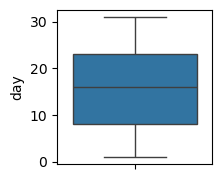

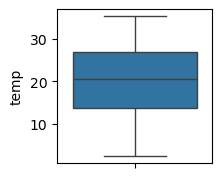

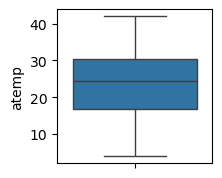

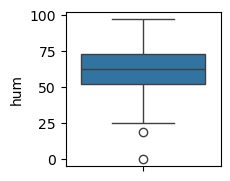

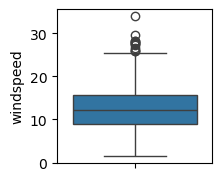

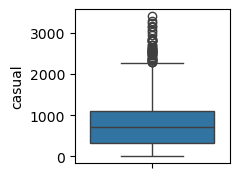

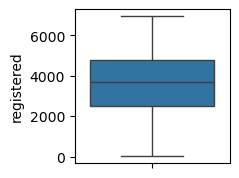

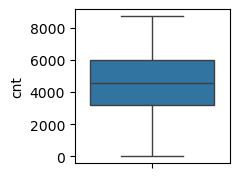

In [270]:
# outlier detection: numerical columns 

for col in num_cols:
    plt.figure(figsize=(2,2))
    sns.boxplot(y=col, data=df)
    plt.show()

    
# some outlier in hum, windspeed, casual

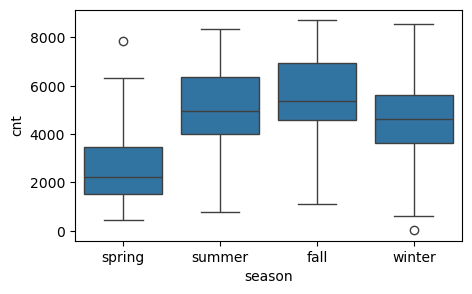

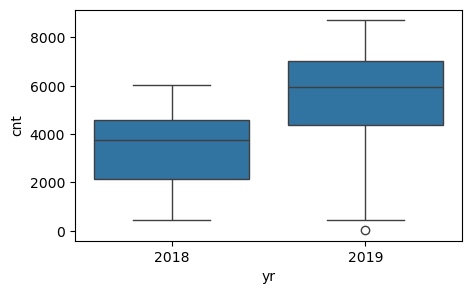

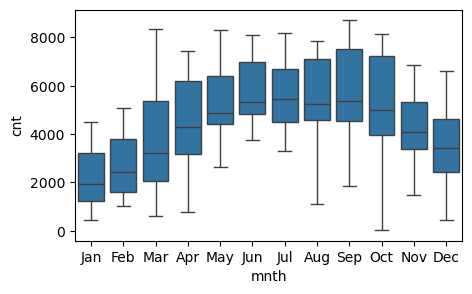

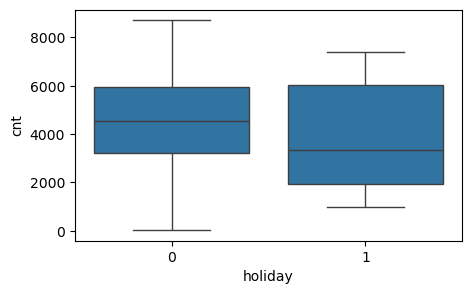

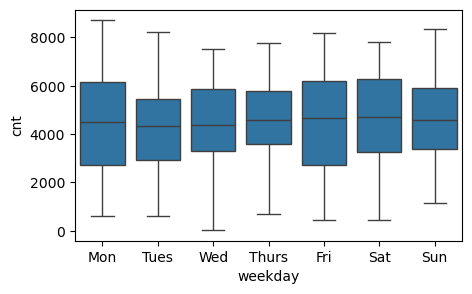

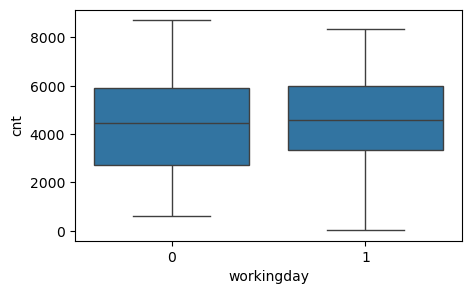

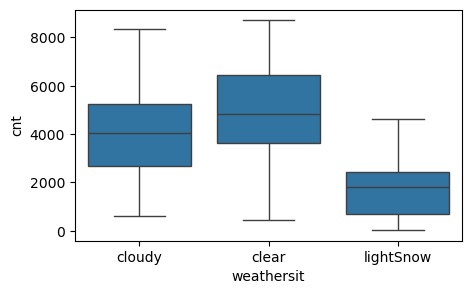

In [271]:
# categorical 


for i in cat_cols:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=i , y='cnt' , data=df)
    plt.show()

# 1. season: show relation with cnt . higher cnt in summer and fall low value in spring.
# 2. year: show relation with cnt . higher cnt in 2019 compared to 2018(Corona, more people are aware of the service now)
# 3. month: show relation with cnt . cnt increase and then decrease . higher durin mid year ,may-Oct( pleasent weather) 
# 4. holiday: show relation with cnt . less count on holidays. People prefer to stay home on other days they go to office
# 5. weather: show relation with cnt . the cnt is higher when weather is clear, less count on lightsnow, no cnt during heavy snow.



## BiVariant

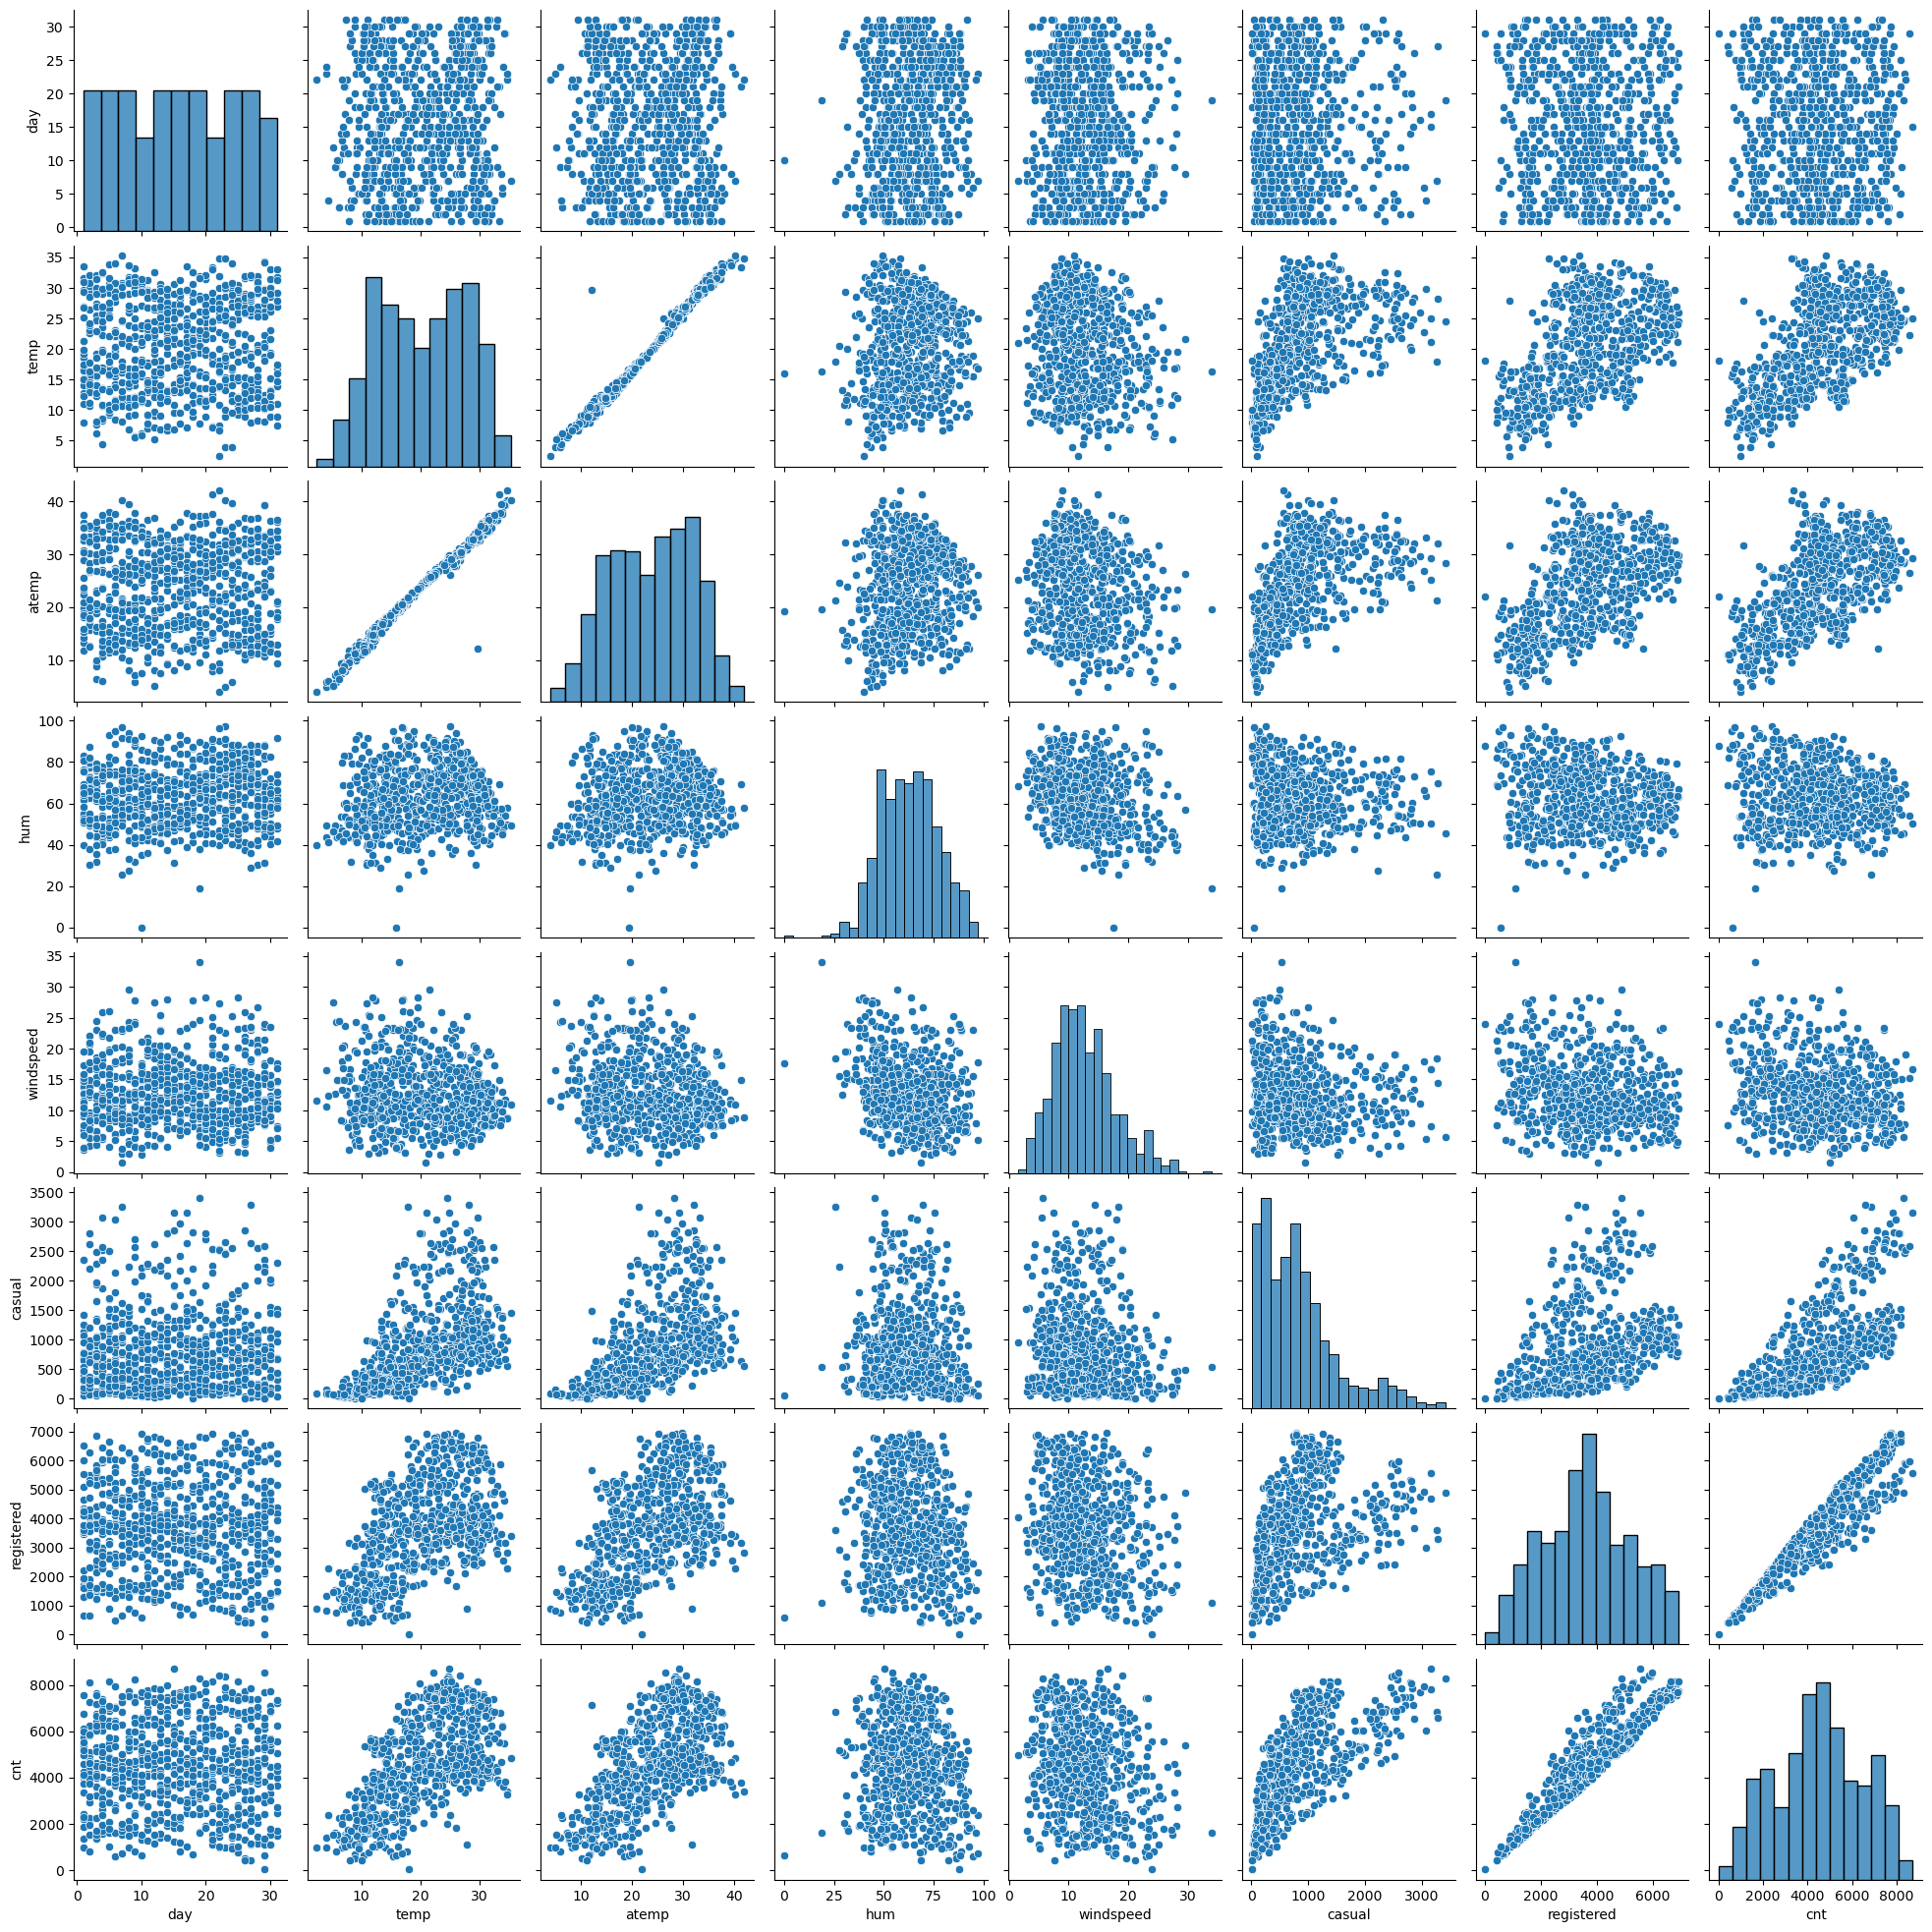

In [272]:
# Pair plot

sns.pairplot(df[num_cols])
plt.show()

- direct realtionship with registered, casual, temp and atemp.
- No visible realtion with windspeed and humidity


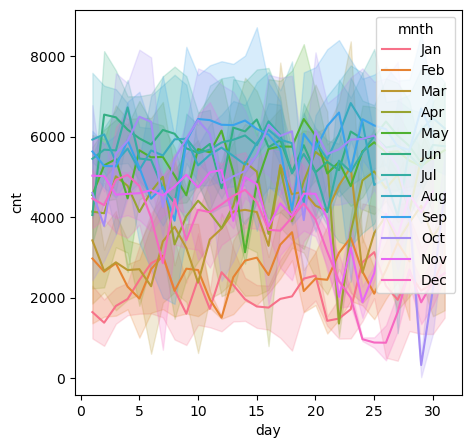

In [273]:
#Timeseries

plt.figure(figsize = (5,5))
sns.lineplot(x='day', y='cnt', hue = 'mnth', data=df)
plt.show()


# no real monthly pattern

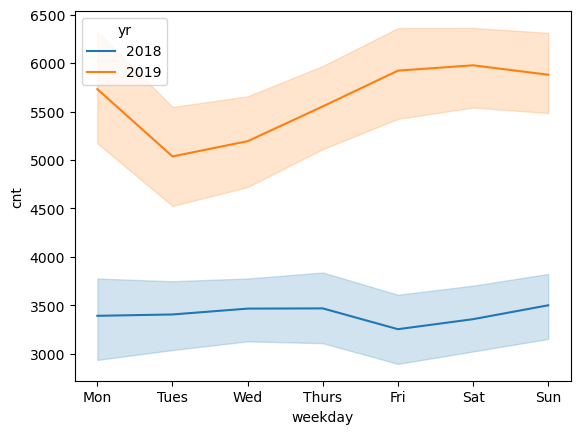

In [274]:
#Timeseries


sns.lineplot(x='weekday', y='cnt', hue='yr', data=df)
plt.show()


# no real weekly pattern

## MultiVariant : HeatMap

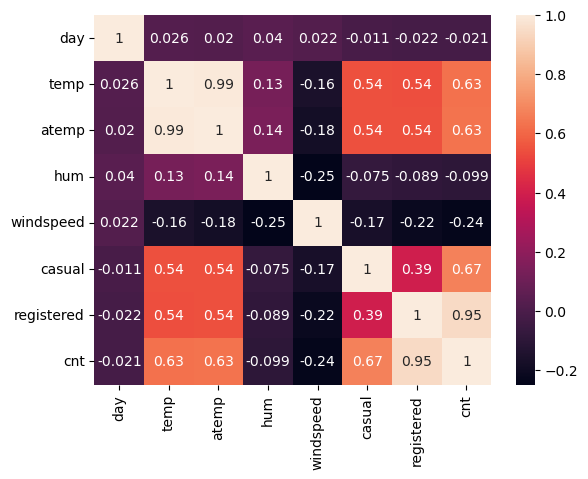

In [275]:
sns.heatmap(df[num_cols].corr(), annot=True)
plt.show()

# high correlation b/w temp and atemp 0.99. atemp seems little more corralated with other columns compared to temp.

- high correlation b/w atemp and temp .99 . lets drop atemp as the corr of atemo is higher compared to tmep
- registered and casual are not featuers lets drop them
- since we already have month, weekday, year lets drop day

# 4.Preprocssing 
Dummy Variable, Train test split and scaling

In [276]:
df= df.drop(['casual','registered','atemp','day'], axis=1)

In [277]:
# convert to binary 0,1
# convert dummy varaible : one hot encoding

In [278]:
print(df.columns)
print(df.shape)


Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')
(730, 11)


In [279]:
df_dummy_var = pd.get_dummies(df[['season', 'mnth', 'weathersit', 'weekday', 'yr']], drop_first=True)
df_dummy_var = df_dummy_var.astype('int')

In [280]:
df_dummy_var.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Sep,weathersit_cloudy,weathersit_lightSnow,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,yr_2019
instant,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [281]:
df = pd.concat([df, df_dummy_var], axis=1)

In [282]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt', 'season_spring',
       'season_summer', 'season_winter', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov',
       'mnth_Oct', 'mnth_Sep', 'weathersit_cloudy', 'weathersit_lightSnow',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thurs',
       'weekday_Tues', 'weekday_Wed', 'yr_2019'],
      dtype='object')

In [283]:
df=df.drop(['season','mnth', 'weathersit', 'weekday', 'yr', 'holiday'], axis=1) #

In [284]:
# train test split

In [285]:
X=df.drop('cnt', axis=1)
y=df['cnt']

In [286]:
X_train , X_test, y_train, y_test    = train_test_split(X,y, test_size = 0.2 , random_state=100)

## Scaling

In [287]:
# let's use standard scalar
X_cols_to_scale = ['temp', 'hum', 'windspeed']
# scalar = StandardScaler()
scalar = MinMaxScaler()
X_train[X_cols_to_scale] = scalar.fit_transform(X_train[X_cols_to_scale])

In [288]:
X_train.head()

,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,...,mnth_Sep,weathersit_cloudy,weathersit_lightSnow,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,yr_2019
instant,,,,,,,,,,,,,,,,,,,,,
368,1,0.113228,0.454701,0.695175,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
649,1,0.468352,0.477458,0.299450,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
45,1,0.443431,0.387290,0.807474,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
706,1,0.326094,0.787463,0.189819,0,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
380,0,0.133996,0.431945,0.449210,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


# 5. Modelling

### Model-1 with all features
Feature set = ['workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov',
       'mnth_Oct', 'mnth_Sep', 'weathersit_cloudy', 'weathersit_lightSnow',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thurs',
       'weekday_Tues', 'weekday_Wed', 'yr_2019']


In [289]:
X_train_sm1 = sm.add_constant(X_train)
model1=create_sm(y_train, X_train_sm1)
# R-square = 85.9

const                   2129.790804
workingday               798.177752
temp                    3894.131704
hum                    -1247.613984
windspeed              -1578.815487
season_spring           -485.214877
season_summer            365.391162
season_winter            946.831785
mnth_Aug                 144.290216
mnth_Dec                -452.762947
mnth_Feb                -250.863631
mnth_Jan                -514.510506
mnth_Jul                -304.307117
mnth_Jun                  78.502460
mnth_Mar                  22.546943
mnth_May                 156.153725
mnth_Nov                -438.503476
mnth_Oct                 111.656450
mnth_Sep                 669.165861
weathersit_cloudy       -515.114600
weathersit_lightSnow   -2291.354087
weekday_Mon              833.636096
weekday_Sat              -21.121344
weekday_Sun               61.629845
weekday_Thurs           -135.423138
weekday_Tues             307.301532
weekday_Wed             -147.164706
yr_2019                 1992



## Feature Selection


### Automatic

In [290]:
lr = LinearRegression()
selector = RFE(estimator = lr,n_features_to_select=15)
selector.fit(X_train, y_train)

# Check the selected features
print("Selected features:", X_train.columns[selector.support_])
print("Feature ranking:", selector.ranking_)


Selected features: Index(['workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul', 'mnth_Nov',
       'weathersit_cloudy', 'weathersit_lightSnow', 'weekday_Mon',
       'weekday_Tues', 'yr_2019'],
      dtype='object')
Feature ranking: [ 1  1  1  1  1  3  1  8  1  4  1  1 10 12  7  1  9  2  1  1  1 13 11  6
  1  5  1]


In [291]:
# print("Top 15 Features Selected by RFE:")
# feature_ranks = sorted(zip(selector.ranking_, X_train.columns))
# for rank, feature in feature_ranks[:15]:
#     print(f"Rank {rank}: {feature}")

### Manual
feature_set = ['workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul', 'mnth_Nov',
       'weathersit_cloudy', 'weathersit_lightSnow', 'weekday_Mon',
       'weekday_Tues', 'yr_2019']

In [292]:
X_train_sm2 = X_train_sm1[['const','workingday', 'temp', 'season_spring', 'season_winter', 'mnth_Dec',
       'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Nov', 'mnth_Sep',
       'weathersit_cloudy', 'weathersit_lightSnow', 'weekday_Mon',
       'weekday_Tues', 'yr_2019']]


# Model : 2

In [293]:
model2 = create_sm(y_train, X_train_sm2)
print(get_vif(X_train_sm2))

# r-square = 83.9

const                   1218.611529
workingday               884.134339
temp                    3659.000716
season_spring           -867.317813
season_winter            724.532508
mnth_Dec                -538.798829
mnth_Feb                -321.863923
mnth_Jan                -544.764344
mnth_Jul                -494.485651
mnth_Nov                -596.887592
mnth_Sep                 452.097986
weathersit_cloudy       -689.220260
weathersit_lightSnow   -2787.497694
weekday_Mon              942.678377
weekday_Tues             438.622125
yr_2019                 2018.691750
dtype: float64



                             OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     197.7
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          6.00e-214
Time:     

In [294]:
# VIF>10 # drop significance level < 0.05

# Lets drop highest P value : mnth_feb

X_train_sm3 = X_train_sm2.drop('mnth_Feb', axis = 1)



### Model : 3

In [295]:
model3 = create_sm(y_train, X_train_sm3)
print(get_vif(X_train_sm3))

# r-square = 83.8

const                   1138.940806
workingday               895.473006
temp                    3763.692071
season_spring           -992.873765
season_winter            714.543092
mnth_Dec                -452.283256
mnth_Jan                -370.233760
mnth_Jul                -514.711426
mnth_Nov                -557.166910
mnth_Sep                 452.137764
weathersit_cloudy       -691.176435
weathersit_lightSnow   -2774.135125
weekday_Mon              956.231949
weekday_Tues             448.605185
yr_2019                 2015.749576
dtype: float64



                             OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     210.6
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          2.22e-214
Time:                        23:32:46   Log-Li

In [296]:
# VIF>10 # drop significance level < 0.05

# All P value are now within range : 0.05

# Lets drop highest VIF : workingday

X_train_sm4 = X_train_sm3.drop('workingday', axis = 1)

### Model : 4

In [297]:

model4 = create_sm(y_train, X_train_sm4)
print(get_vif(X_train_sm4))

# r-square = 83.3

const                   2030.211019
temp                    3741.378292
season_spring          -1027.490450
season_winter            718.546908
mnth_Dec                -481.142804
mnth_Jan                -393.596498
mnth_Jul                -524.174759
mnth_Nov                -638.180180
mnth_Sep                 417.908681
weathersit_cloudy       -679.418247
weathersit_lightSnow   -2743.755797
weekday_Mon               95.956183
weekday_Tues            -409.937812
yr_2019                 2011.987872
dtype: float64



                             OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     218.6
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.49e-211
Time:                        23:32:46   Log-Likelihood:                -4732.4
No.

In [298]:
# VIF>10 # drop significance level < 0.05

# Lets drop highest P value : weekday_Mon

X_train_sm5 = X_train_sm4.drop('weekday_Mon', axis = 1)

### Model : 5
feature_set = ['const', 'temp', 'season_spring', 'season_winter', 'mnth_Dec',
       'mnth_Jan', 'mnth_Jul', 'mnth_Nov', 'mnth_Sep', 'weathersit_cloudy',
       'weathersit_lightSnow', 'weekday_Tues', 'yr_2019']

In [299]:

model5 = create_sm(y_train, X_train_sm5)
print(get_vif(X_train_sm5))

# r-square = 83.3

const                   2052.982220
temp                    3733.936358
season_spring          -1028.520040
season_winter            718.579993
mnth_Dec                -480.148477
mnth_Jan                -394.274228
mnth_Jul                -520.544516
mnth_Nov                -641.339371
mnth_Sep                 420.535670
weathersit_cloudy       -680.240368
weathersit_lightSnow   -2743.013273
weekday_Tues            -427.170912
yr_2019                 2009.256514
dtype: float64



                             OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     236.7
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.57e-212
Time:                        23:32:46   Log-Likelihood:                -4732.9
No. Observations:                 584  

### model 6
feature_set = ['const', 'temp', 'season_spring', 'season_winter', 'mnth_Dec',
       'mnth_Jan', 'mnth_Jul', 'mnth_Nov', 'mnth_Sep', 'weathersit_cloudy',
       'weathersit_lightSnow', 'yr_2019']

In [300]:
X_train_sm5.columns

Index(['const', 'temp', 'season_spring', 'season_winter', 'mnth_Dec',
       'mnth_Jan', 'mnth_Jul', 'mnth_Nov', 'mnth_Sep', 'weathersit_cloudy',
       'weathersit_lightSnow', 'weekday_Tues', 'yr_2019'],
      dtype='object')

In [302]:
# lets drop 1 more features and check performance. I am choosing features with minimum coefficient value weekday_Tue
# weekday_Tue, mnth_Sep, mnth_Jan
X_train_sm6 = X_train_sm5.drop('weekday_Tues', axis = 1)
model6 = create_sm(y_train, X_train_sm6)
print(get_vif(X_train_sm6))

const                   1953.882175
temp                    3777.061345
season_spring          -1027.387895
season_winter            713.350186
mnth_Dec                -461.064348
mnth_Jan                -381.293677
mnth_Jul                -541.595769
mnth_Nov                -635.535975
mnth_Sep                 425.564150
weathersit_cloudy       -662.778244
weathersit_lightSnow   -2692.292901
yr_2019                 2012.487509
dtype: float64



                             OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     247.6
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          2.85e-209
Time:                        23:32:46   Log-Likelihood:                -4743.5
No. Observations:                 584   AIC:                             95

In [303]:
# lets drop 1 more features and check performanc. I am choosing features with minimum coefficient value weekday_Tue
# weekday_Tue, mnth_Sep, mnth_Jan
X_train_sm7 = X_train_sm6.drop('mnth_Sep', axis = 1)
model7 = create_sm(y_train, X_train_sm7)
print(get_vif(X_train_sm7))

const                   1923.772372
temp                    3909.669885
season_spring          -1038.582688
season_winter            736.748249
mnth_Dec                -487.916153
mnth_Jan                -369.406619
mnth_Jul                -625.254032
mnth_Nov                -682.282782
weathersit_cloudy       -654.267658
weathersit_lightSnow   -2665.419908
yr_2019                 2008.171308
dtype: float64



                             OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     266.9
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          2.99e-208
Time:                        23:32:46   Log-Likelihood:                -4748.8
No. Observations:                 584   AIC:                             9520.
Df Residuals:                   

In [304]:
X_train_sm8 = X_train_sm7.drop('mnth_Jan', axis = 1)
model8 = create_sm(y_train, X_train_sm8)
print(get_vif(X_train_sm8))

const                   1802.965012
temp                    4095.628657
season_spring          -1107.199863
season_winter            742.126158
mnth_Dec                -404.298909
mnth_Jul                -661.634515
mnth_Nov                -636.740357
weathersit_cloudy       -658.434105
weathersit_lightSnow   -2634.208318
yr_2019                 2002.104008
dtype: float64



                             OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     293.5
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          3.10e-208
Time:                        23:32:46   Log-Likelihood:                -4751.8
No. Observations:                 584   AIC:                             9524.
Df Residuals:                     574   BIC:                        

In [305]:
# for col in ['weekday_Tues']:
#     print('-----dropping---col', col)
#     X_train_sm = X_train_sm.drop(col, axis=1)
#     model_8 = create_sm(y_train, X_train_sm)
#     print(get_vif(X_train_sm))

In [306]:
X_train_sm9 = X_train_sm8.drop('mnth_Dec', axis = 1)
model9 = create_sm(y_train, X_train_sm9)
print(get_vif(X_train_sm8))

const                   1683.575068
temp                    4272.551745
season_spring          -1090.019558
season_winter            639.266562
mnth_Jul                -694.158584
mnth_Nov                -484.421430
weathersit_cloudy       -653.328550
weathersit_lightSnow   -2616.849443
yr_2019                 1998.911922
dtype: float64



                             OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     324.9
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.07e-207
Time:                        23:32:46   Log-Likelihood:                -4756.0
No. Observations:                 584   AIC:                             9530.
Df Residuals:                     575   BIC:                             9569.
Df Model:                

# Final Model

In [307]:


X_train_sm10 = X_train_sm9.drop('mnth_Nov', axis = 1)
model10 = create_sm(y_train, X_train_sm10)
print(get_vif(X_train_sm10))

const                   1583.042280
temp                    4412.431530
season_spring          -1037.047521
season_winter            512.503892
mnth_Jul                -717.512243
weathersit_cloudy       -638.163898
weathersit_lightSnow   -2588.670710
yr_2019                 1999.932897
dtype: float64



                             OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     364.0
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          8.72e-207
Time:                        23:32:46   Log-Likelihood:                -4761.2
No. Observations:                 584   AIC:                             9538.
Df Residuals:                     576   BIC:                             9573.
Df Model:                           7                        

# Residual Analysis and Prediction

In [308]:
y_train_pred10 = model10.predict(X_train_sm10)
residual = y_train_pred10-y_train

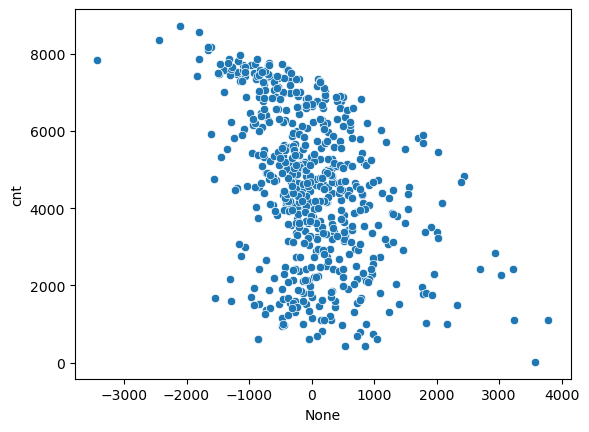

In [309]:
sns.scatterplot(x=residual, y=y_train)
plt.show()

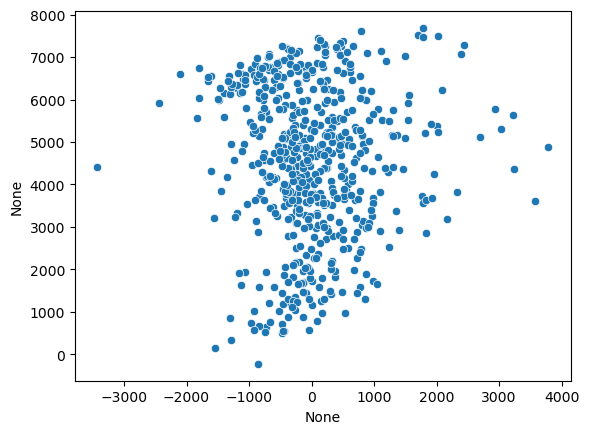

In [310]:
sns.scatterplot(x=residual, y=y_train_pred10)
plt.show()

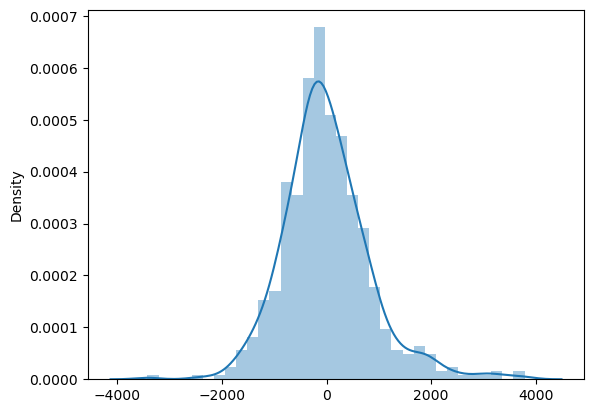

In [311]:
sns.distplot(x=residual)
plt.show()

### final_model on linear regresssion

In [312]:
# # # features = list(X_train_sm10.columns).remove('const')
# # features

# X_train_sm10.columns

In [313]:
# features = ['temp', 'season_spring', 'season_winter', 'mnth_Jul',
#        'weathersit_cloudy', 'weathersit_lightSnow', 'yr_2019']

# X_train_selected = X_train[features]

# lr = LinearRegression()
# model_final = lr.fit(X_train_selected, y_train)

# Evaluation

### On train data

In [314]:
features = ['const','temp', 'season_spring', 'season_winter', 'mnth_Jul',
       'weathersit_cloudy', 'weathersit_lightSnow', 'yr_2019']

In [315]:

y_train_pred1 = model10.predict(X_train_sm1[features])
get_metrics(y_train, y_train_pred1)

r2 score :  0.8156169506520488
mse :  706116.0057554174


### On Test data

In [316]:
X_test_sm=X_test.copy()

X_cols_to_scale = ['temp', 'hum', 'windspeed']
X_test_sm[X_cols_to_scale] = scalar.transform(X_test_sm[X_cols_to_scale])
X_test_sm = sm.add_constant(X_test_sm)



In [317]:
# model10
X_test_sm10= X_test_sm[features]

y_test_pred10 = model10.predict(X_test_sm10)
r2= r2_score(y_test, y_test_pred10)
mse = mean_squared_error(y_test, y_test_pred10)

print('model 1', 'r2_score: ', r2, 'mse: ', mse)

model 1 r2_score:  0.7872090139505535 mse:  722728.6318307864
